# Soumyadip Bera

### **Task 1 - Simple Linear Regression - GRIP, Sparks Foundation**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the data
score_data=pd.read_csv('http://bit.ly/w-data')

In [3]:
# data successfully imported, displaying it
score_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
score_data1=score_data.copy()

In [5]:
# checking for null values
score_data1.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
score_data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Selecting the input feature, that is, 'Hours'
x=score_data1.loc[:,['Hours']]
x.shape

(25, 1)

In [8]:
# Storing the output feature, i.e., 'Scores', in the variable 'y'
y=score_data1.loc[:,['Scores']]

In [9]:
# Splitting the data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [10]:
# Creating an instance of sklearn.linear_model.LinearRegression
lgr=LinearRegression()

In [11]:
# Creating a training model by fitting the training values
model=lgr.fit(x_train,y_train)

In [12]:
# predicting the output values for the test data
predicted=lgr.predict(x_test)

In [13]:
# Degree of accuracy of prediction
r2_score(y_test,predicted)

0.9393343640876535

In [14]:
import math
math.sqrt(mean_squared_error(y_test,predicted))

6.525602256360922

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

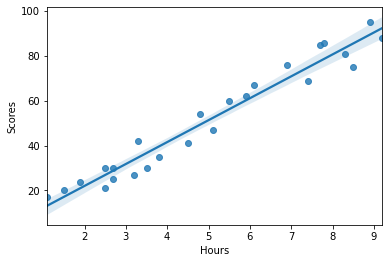

In [16]:
sns.regplot(x='Hours',y='Scores',data=score_data)

In [17]:
print(predicted)

[[89.63994329]
 [75.5169961 ]
 [17.1421477 ]
 [34.08968433]
 [76.45852591]
 [86.81535385]
 [81.16617498]
 [45.38804209]]


In [18]:
y_df1=y_test.reset_index(drop=True)
y_df1

,Scores
0,88
1,85
2,20
3,42
4,86
5,95
6,81
7,41


In [19]:
pd.DataFrame(predicted)

,0
0,89.639943
1,75.516996
2,17.142148
3,34.089684
4,76.458526
5,86.815354
6,81.166175
7,45.388042


In [20]:
# Creating an "Actual vs Predicted" DataFrame
result =  pd.concat([y_df1, pd.DataFrame(predicted)], axis=1, join='inner')

In [21]:
result

,Scores,0
0,88,89.639943
1,85,75.516996
2,20,17.142148
3,42,34.089684
4,86,76.458526
5,95,86.815354
6,81,81.166175
7,41,45.388042


In [22]:
result1=result.rename(columns={0:'Predictions'})

In [23]:
result1

,Scores,Predictions
0,88,89.639943
1,85,75.516996
2,20,17.142148
3,42,34.089684
4,86,76.458526
5,95,86.815354
6,81,81.166175
7,41,45.388042


In [24]:
x_variable=lgr.coef_*x+lgr.intercept_

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

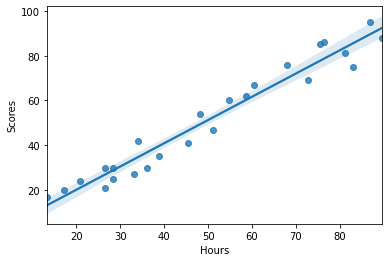

In [25]:
sns.regplot(x_variable,y)